In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tegarakmal","key":"64dd9e4ecfd40a542f2f0f44e529da4b"}'}

In [2]:
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 66% 10.0M/15.1M [00:00<00:00, 101MB/s]
100% 15.1M/15.1M [00:00<00:00, 124MB/s]


In [4]:
import zipfile

local_zip = './brain-mri-images-for-brain-tumor-detection.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [14]:
import os
for dirname, _, filenames in os.walk('./brain_tumor_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./brain_tumor_dataset/yes/Y69.jpg
./brain_tumor_dataset/yes/Y86.JPG
./brain_tumor_dataset/yes/Y181.jpg
./brain_tumor_dataset/yes/Y52.jpg
./brain_tumor_dataset/yes/Y249.JPG
./brain_tumor_dataset/yes/Y255.JPG
./brain_tumor_dataset/yes/Y195.JPG
./brain_tumor_dataset/yes/Y11.jpg
./brain_tumor_dataset/yes/Y27.jpg
./brain_tumor_dataset/yes/Y22.jpg
./brain_tumor_dataset/yes/Y153.jpg
./brain_tumor_dataset/yes/Y14.jpg
./brain_tumor_dataset/yes/Y186.jpg
./brain_tumor_dataset/yes/Y49.JPG
./brain_tumor_dataset/yes/Y58.JPG
./brain_tumor_dataset/yes/Y65.JPG
./brain_tumor_dataset/yes/Y154.jpg
./brain_tumor_dataset/yes/Y250.jpg
./brain_tumor_dataset/yes/Y4.jpg
./brain_tumor_dataset/yes/Y184.JPG
./brain_tumor_dataset/yes/Y23.JPG
./brain_tumor_dataset/yes/Y100.JPG
./brain_tumor_dataset/yes/Y50.JPG
./brain_tumor_dataset/yes/Y28.jpg
./brain_tumor_dataset/yes/Y15.jpg
./brain_tumor_dataset/yes/Y78.jpg
./brain_tumor_dataset/yes/Y147.JPG
./brain_tumor_dataset/yes/Y19.JPG
./brain_tumor_dataset/yes/Y92.png
./br

# IMPORT LIBRARY


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

In [31]:
target_dir = "./brain_tumor_dataset/"

In [13]:
!ls ./brain_tumor_dataset/

no  yes


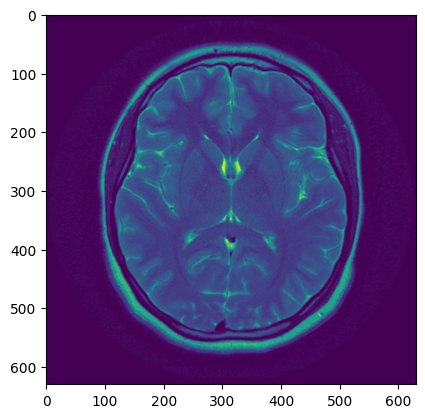

In [20]:
img = mpimg.imread("./brain_tumor_dataset/no/1 no.jpeg")
plt.imshow(img)

In [21]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
def random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")
  return img

Image shape: (225, 225, 3)


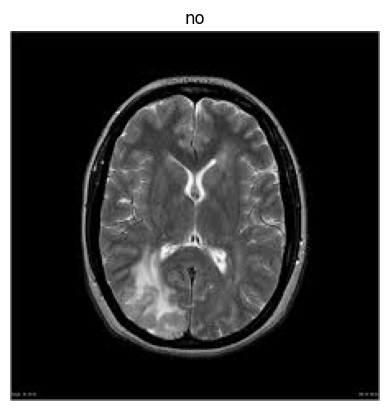

In [27]:
img_no = random_image(target_dir="",
                        target_class="no")

Image shape: (251, 201, 3)


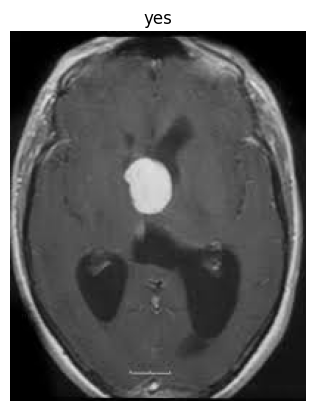

In [28]:
img_no = random_image(target_dir="",
                        target_class="yes")

# Preprocessing Image

In [29]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.8,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

In [32]:
train_data = generator.flow_from_directory(target_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

test_data = generator.flow_from_directory(target_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [ ]:
test_data

# 

In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.Conv2D(32, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [35]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(train_data, 
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

In [ ]:
model.evaluate(test_data)

In [ ]:
pd.DataFrame(model_history.history).plot()

In [ ]:
model.summary()

In [ ]:
model.save('model.h5')